insert

### Assignments Half Moon
##### 1) A linear logistic classifier is only able to create a linear decision boundary. Change the Logistic classifier into a (non-linear) neural network by inserting a dense hidden layer between the input and output layers of the model

First we use a linear logistic classifier to clisify the half moon data.

Epoch # | Train Cost | Val Cost
--- | --- | ---
0 | 1.066 | 1.065
100 | 0.514 | 0.531
200 | 0.413 | 0.432
300 | 0.370 | 0.390
400 | 0.346 | 0.367
500 | 0.330 | 0.353
600 | 0.321 | 0.344
700 | 0.314 | 0.339
800 | 0.310 | 0.336
900 | 0.307 | 0.334

Test Cost 0.277

producing the folling dicision boundaries





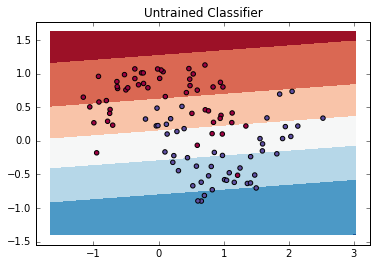

In [1]:


%matplotlib inline
from IPython.display import Image
from __future__ import division, print_function
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import theano
import theano.tensor as T
import lasagne

from lasagne.nonlinearities import softmax
from lasagne.layers import InputLayer, DenseLayer, get_output

from lasagne.regularization import regularize_layer_params_weighted, l2, l1
from lasagne.regularization import regularize_network_params

Image(filename='plots_linear/untrained.png')
#Image(filename='plots_linear/untrained.png')
#Image(filename='plots_linear/convergence.png')


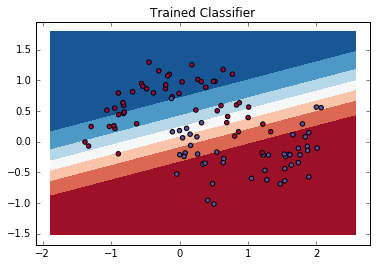

In [2]:
Image(filename='plots_linear/trained.png')

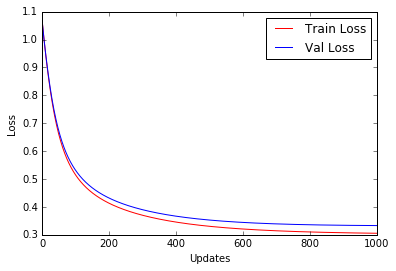

In [3]:
Image(filename='plots_linear/convergence.png')

Now we add nonlinearity using tanh with 1 hidden layer with 10 neurons. The folling errors are produced:

Epoch # | Train Cost | Val Cost
--- | --- | ---
0 | 0.891 | 0.872
100 | 0.324 | 0.344
200 | 0.309 | 0.333
300 | 0.305| 0.329
400 | 0.296 | 0.322
500 | 0.274 | 0.303
600 | 0.201 | 0.242
700 | 0.118 | 0.174
800 | 0.072 | 0.144
900 | 0.049 | 0.136

Test Cost 0.061




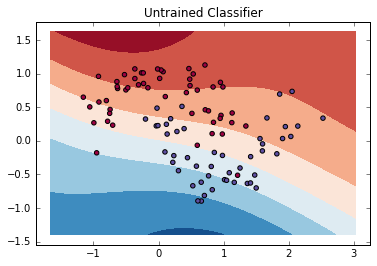

In [4]:
Image(filename='1_layer/untrained.png')

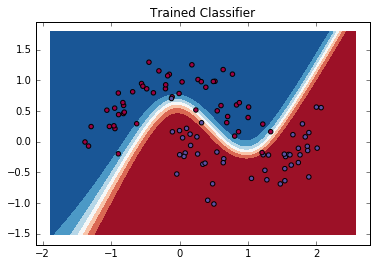

In [5]:
Image(filename='1_layer/trained.png')

In [6]:
#Image(filename='1_layer/convergence.png')

##### 2) Experiment with multiple hidden layers or more / less hidden units. What happens to the decision boundary?

##### 3) Overfitting: When increasing the number of hidden layers / units the neural network will fit the training data better by creating a highly nonlinear decision boundary. If the model is too complex it will often generalize poorly to new data (validation and test set). Can you observe this from the training and validation errors?


Now we add nonlineary using tanh in 3 hidden layers with 10, 8 and 8 neurons, respectively. The following test error is estimated to 0.061. 

Epoch # | Train Cost | Val Cost
--- | --- | ---
0 | 0.777 | 0.707
100 | 0.0171 | 0.216
200 | 0.0.025 | 0.156
300 | 0.01 | 0.190
400 | 0.005 | 0.215
500 | 0.003 | 0.234
600 | 0.002 | 0.251
700 | 0.001 | 0.266
800 | 0.001 | 0.278
900 | 0.001 | 0.288

Test Cost 0.061


 The test error is improved remarkable compared to the linear classifier. The train error is improved the most compared to the validation error indicating some sort of overfitting. The decision boundary become more complex with increased hidden layers.


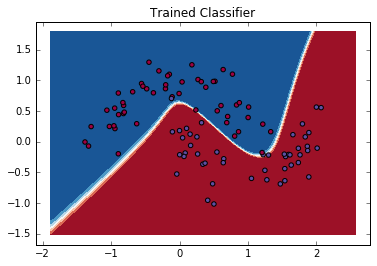

In [7]:
#from IPython.display import Image
Image(filename='non_linear/trained.png')


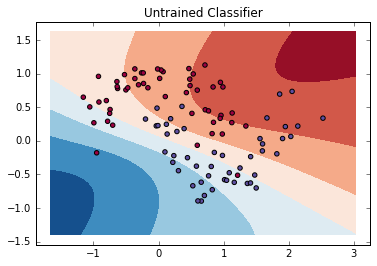

In [8]:
Image(filename='non_linear/untrained.png')

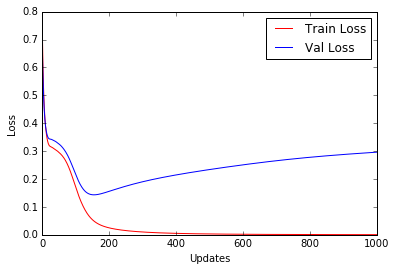

In [9]:
Image(filename='non_linear/convergence.png')

##### 3) We used the vanilla stocastic gradient descent algorithm for parameter updates. This is usually slow to converge and more sophisticated pseudo-second-order methods usually works better. Try changing the optimizer to adam or adamax (lasagne.updates.adam, lasagne.updates.adamax)

Now we change to a adamax optimizer instead of the relative slow stochastic gradient (SGD) optimizer.


Epoch # | Train Cost | Val Cost
--- | --- | ---
0 | 0.777 | 0.725
100 | 0.236 | 0.271
200 | 0.035 | 0.147
300 | 0.014 | 0.184
400 | 0.007 | 0.214
500 | 0.004 | 0.235
600 | 0.003 | 0.251
700 | 0.002 | 0.265
800 | 0.001 | 0.276
900 | 0.001 | 0.285

Test Cost: 0.056

This setup of hyperparameters showed the best performance for classification of the full moon dataset.





## MNIST Exercise
##### Do you see overfitting? Google overfitting if you don't know how to spot it
As we can see in the figure below, we have a huge gab between the train error and the validation error indicating overfitting.
In this network we used one hidden layer with 500 neurons, elu activation function in the hidden layer and softmax activation function in the outer layer

For the MNIST data we get an error after 100 epochs, a train loss 0.003222397 , train acc 1.000000,  valid acc 0.826000 




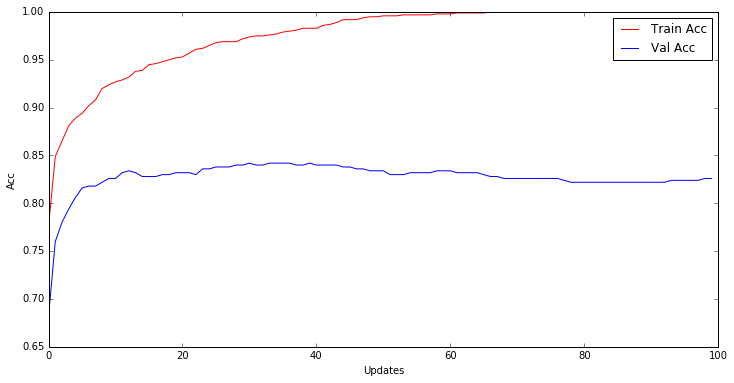

In [10]:

Image(filename='error.png')

##### Regularization is a method to reduce overfitting. Adding noise to your network is a popular method to fight overfitting. Try using Dropout in your network. Lasagne DropoutLayer.

We perform regulization to prevent overfitting. A dropout layer is added with 0.5 probability for setting a neuron to zero in the input layer.

After 100 epoch we have train Loss 0.007763022 , train acc 0.999000,  valid acc 0.836000 

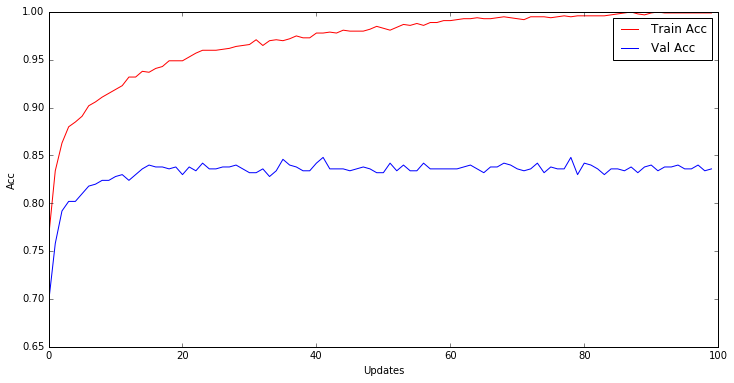

In [11]:
Image(filename='error_dropout.png')

Now we add one more dropout layer to the network in the hidden layer. The dropbout layer will randomly set the neurons to zero, eliminating single neurons having to much impactWe see that the validation accuracy improves:

At the 100 epoch the train loss is 2.498543e-02 , the train acc is 0.976000, and the valid acc is0.844000


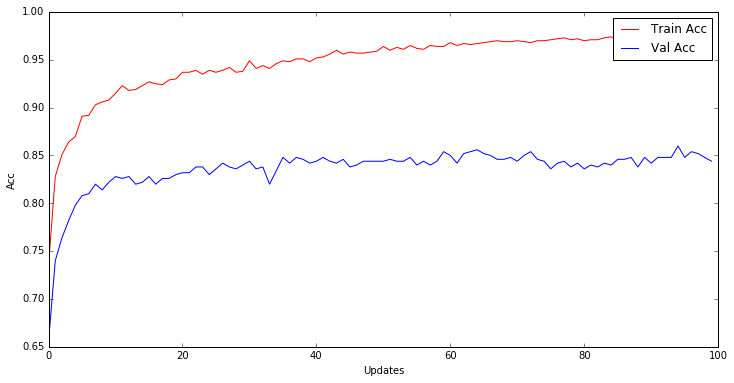

In [12]:
Image(filename='error_dropout_2layer.png')

##### Alternatively you can regularize your network by penalizing the L2 or L1 norm of the network parameters. Read the docs for more info.

Now we use l2 regulization with weight decay equal $10^{-7}$


At the 100 epoch, the train loss is 2.499231e-02 , the train acc is 0.976000, and the valid accuracy is 0.844000



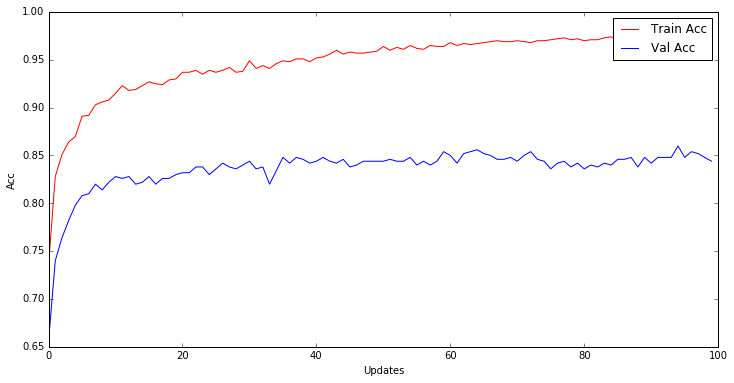

In [13]:
Image(filename='error_with_reg_dropout_2l.png')

# Exercises from the book
##### Sigmoid neurons simulating perceptrons, part I Suppose we take all the weights and biases in a network of
perceptrons, and multiply them by a positive constant, .
Show that the behaviour of the network doesn't change.

##### Sigmoid neurons simulating perceptrons, part I
##### Suppose we take all the weights and biases in a network of
##### perceptrons, and multiply them by a positive constant, .
##### Show that the behaviour of the network doesn't change.

We assume we have a simple network with 2 neurons; $w1=0.5$ and $w2=0.4$ and 2 inputs; $x1=2$ and $x2=3$, and with bias of 10.
If we evaluate the activiation of the perceptron we have: 
    $z=0.5*2+10+0.4*3+10=22.2$
which is positive

Now we have a constant c=2
$z=2*0.5*2+10+2*0.4*3+10= 24.4000$
which is positive again

The behavouir of the neuron does not change.


##### Sigmoid neurons simulating perceptrons, part II  
##### Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value, we just need the input to have been fixed. Suppose the weights and biases are such that w⋅x+b≠0w⋅x+b≠0 for the input xx to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c>0c>0. Show that in the limit as c→∞c→∞ the behaviour of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when w⋅x+b=0w⋅x+b=0 for one of the perceptrons?


$ 1/(1+exp(-((0.5*2-10)+(0.4*3-10))))=
   1.8602e-08$
 
 while if we have a constant c=2
   
 $ 1/(1+exp(-((2*0.5*2-10)+(2*0.4*3-10))))=1.6788e-07$
   
and now we choose $c=20$

$1/(1+exp(-((20*0.5*2-10)+(20*0.4*3-10))))=1$

If c is a large number the neuron will act as a perceptron and the output will be approximately 1.

However, if the overall bias $b$ is greater than $w_j\cdot x_j$ the output will be zero, because $e^{(-\inf)}=0$ 



##### I explained gradient descent when is a function of two
##### variables, and when it's a function of more than two variables.
##### What happens when is a function of just one variable? Can
##### you provide a geometric interpretation of what gradient
##### descent is doing in the one-dimensional case?



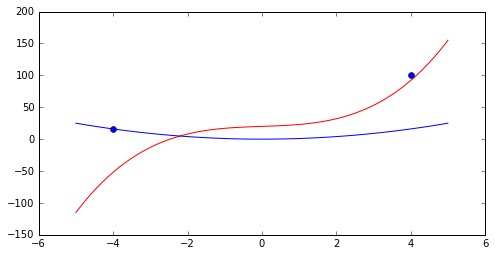

In [14]:
x = np.linspace(-5,5,100)

y=x**3+x*2+20
y2=x**2
plt.figure(figsize=(8,4))
plt.plot(x,y,'r',-4,16,'ob')
plt.plot(x,y2,'b',4,100,'ob')


In a one dimensinal case the the gradient will be equal to the slope of the function. This is illustrated in the two figures above in which the SGD will tend to go downhill in solution space. This will give a unique minumun for the function $y=x^2$. However, in case of the blue curve $y=x^3+x*2+20$ we gradient might get stocked in a saddle point depending on the learning rate.

##### An extreme version of gradient descent is to use a mini-batch
##### size of just 1. That is, given a training input, , we update our
##### weights and biases according to the rules
##### and . Then we
##### choose another training input, and update the weights and
##### biases again. And so on, repeatedly. This procedure is known as
##### or incremental learning. In online learning, a
##### neural network learns from just one training input at a time
##### (just as human beings do). Name one advantage and one
##### disadvantage of online learning, compared to stochastic
##### gradient descent with a mini-batch size of, say, 20.

Ideally, gradient descent smaller with mini-batch size will increase performance. However, this will be computational expensive, and thus the size of mini batch is a trade off between computation expensiveness and accuracy. However, for online learning a mini batch size of 1 might yield too slow training. 

##### Write out Equation (22) in component form, and verify that it
##### gives the same result as the rule (4) for computing the output
##### of a sigmoid neuron.
We use the fact that a matrix product can be written as a sum product at a index j. 
$a' = \sigma(\boldsymbol{w}\cdot \boldsymbol{a}+\boldsymbol{b})=\frac{1}{1+exp(-\boldsymbol{w}\cdot \boldsymbol{x}+b)}= \frac{1}{1+exp(-\sum w_j \cdot x_j-b)}$